# 🧪 Lab 12: Anomaly Detection in Network Traffic

**Objective**: Use unsupervised learning to detect anomalies in network traffic data.

**Theory**:
- Anomaly detection identifies data points that deviate significantly from normal patterns.
- Isolation Forest isolates anomalies by randomly selecting features and splitting values.
- Local Outlier Factor (LOF) compares local density of a point to its neighbors.
- These models are useful in cybersecurity, fraud detection, and system monitoring.


Isolation Forest and Local Outlier Factor (LOF) are both popular unsupervised anomaly detection algorithms, but they approach the problem from different perspectives:

**Isolation Forest:**
**Approach:** It works by isolating anomalies rather than profiling normal data points. It does this by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This process is recursively repeated to build isolation trees.
**Anomaly Detection:** Anomalies are typically points that are easier to isolate (meaning they require fewer splits to be separated from the rest of the data). They often lie in less dense regions.
    
**Efficiency:** Generally more efficient for large datasets and high-dimensional data, as it doesn't calculate distances between all points.

**Local Outlier Factor (LOF):**
**Approach:** It's a density-based algorithm. It measures the local deviation of density of a given data point with respect to its neighbors. The 'local' aspect is crucial, meaning that LOF can identify anomalies even in areas where the global density is high.

**Anomaly Detection:** A point is considered an outlier if its local density is significantly lower than that of its neighbors. It compares the local reachability density (LRD) of a point with the LRDs of its neighbors.

**Sensitivity:** Can be more sensitive to the choice of the number of neighbors (n_neighbors) and might be less efficient for very large datasets due to distance calculations.

In summary, Isolation Forest is a partitioning-based method that looks for points that are easy to separate, while LOF is a density-based method that looks for points that are less dense than their local neighborhood.

Data Source: https://www.kaggle.com/datasets/ravikumargattu/network-traffic-dataset

In [5]:
# 📥 Step 1: load the dataset
import pandas as pd
url = "network_traffic.csv"
df = pd.read_csv(url, engine='python', on_bad_lines='skip')
df.head()

,Time,Source,No.,Destination,Protocol,Length,Info
0,0.000000,192.167.8.166,1,192.167.255.255,NBNS,92.0,Name query NB WPAD<00>
1,0.784682,192.167.8.166,2,192.167.255.255,NBNS,92.0,Name query NB WPAD<00>
2,1.169060,VMware_8a:5c:e6,3,Broadcast,ARP,60.0,Who has 192.167.7.175? Tell 192.167.0.1
3,2.167949,VMware_8a:5c:e6,4,Broadcast,ARP,60.0,Who has 192.167.7.175? Tell 192.167.0.1
4,3.170095,VMware_8a:5c:e6,5,Broadcast,ARP,60.0,Who has 192.167.7.175? Tell 192.167.0.1


## 🧹 Step 2: Preprocess the data
- Drop non-numeric or irrelevant columns
- Scale features for distance-based models

In [6]:
# Drop non-numeric columns
df = df.select_dtypes(include=['float64', 'int64'])

# Fill missing values
df = df.fillna(df.mean())

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

## 🌲 Step 3: Apply Isolation Forest
Isolation Forest isolates anomalies by randomly partitioning the data.

In [11]:
# Train Isolation Forest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05, random_state=42)
iso_labels = iso.fit_predict(X_scaled)

# Add predictions to DataFrame
df['Iso_Anomaly'] = iso_labels
df['Iso_Anomaly'] = df['Iso_Anomaly'].map({1: 'Normal', -1: 'Anomaly'})
df['Iso_Anomaly'].value_counts()
df.head()

,Time,No.,Length,Iso_Anomaly,LOF_Anomaly
0,0.000000,1,92.0,Anomaly,Anomaly
1,0.784682,2,92.0,Anomaly,Anomaly
2,1.169060,3,60.0,Anomaly,Anomaly
3,2.167949,4,60.0,Anomaly,Anomaly
4,3.170095,5,60.0,Anomaly,Anomaly


## 🔍 Step 4: Apply Local Outlier Factor (LOF)
LOF compares the local density of each point to its neighbors.

In [8]:
# Train LOF
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_labels = lof.fit_predict(X_scaled)

# Add predictions
df['LOF_Anomaly'] = lof_labels
df['LOF_Anomaly'] = df['LOF_Anomaly'].map({1: 'Normal', -1: 'Anomaly'})
df['LOF_Anomaly'].value_counts()

,count
LOF_Anomaly,
Normal,273124
Anomaly,14375


## 📊 Step 5: Visualize anomalies
We’ll use PCA to reduce dimensions and plot anomalies.

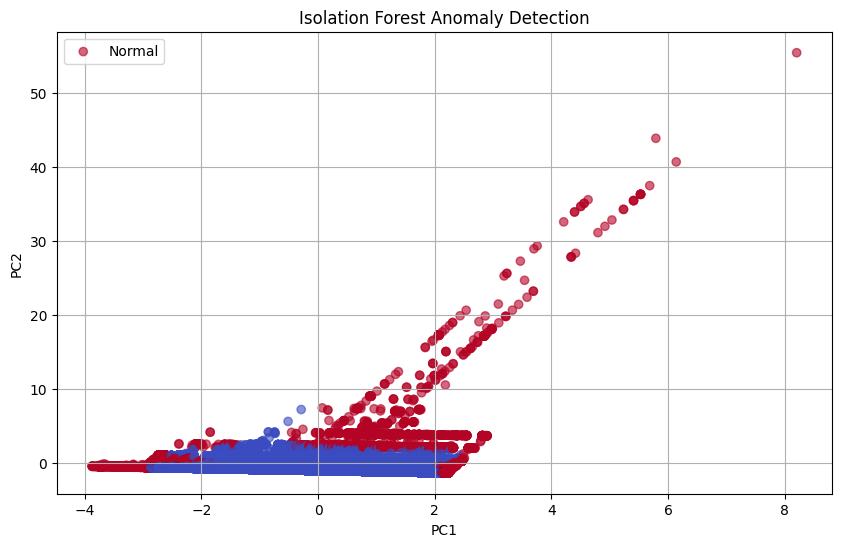

In [10]:
# Reduce dimensions with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot Isolation Forest results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(df['Iso_Anomaly'] == 'Anomaly'), cmap='coolwarm', alpha=0.6)
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(['Normal', 'Anomaly'])
plt.grid(True)
plt.show()

## 📝 Reflection Questions

1. What types of anomalies might appear in network traffic?
2. How do Isolation Forest and LOF differ in their approach?
3. Why is scaling important before applying these models?
4. How could this technique be used in digital health or fintech systems?